In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import os
import pickle
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [5]:
with open('/Users/bogao/DataFiles/new landscape/data/reduced_gene_mat.pkl', 'rb') as fi:
    data = pickle.load(fi)

In [8]:
with open('/Users/bogao/DataFiles/new landscape/files/all_bands_subtype_label.pkl', 'rb') as fi:
    labels = pickle.load(fi)


In [12]:
dd = data[labels['disease'] != 'NA']

In [13]:
dd.shape

(22671, 927)

In [14]:
labels

,site,code,disease
0,Ovary,84413,Ovary Carcinoma
1,Ovary,84413,Ovary Carcinoma
2,Ovary,84413,Ovary Carcinoma
3,Ovary,84603,NA
4,Ovary,84413,Ovary Carcinoma
...,...,...,...
42815,Ovary,84421,Ovary Carcinoma
42816,Ovary,84421,Ovary Carcinoma
42817,Ovary,84421,Ovary Carcinoma
42818,Ovary,84421,Ovary Carcinoma


In [16]:
disease_names = list(np.unique(labels['disease']))
disease_names.remove('NA')

In [21]:
dd  = []
for disease in disease_names:
    dd.append(np.sum(data[labels['disease'] == disease],axis=0))

In [23]:
dd = np.array(dd)

In [26]:
ddd = preprocessing.minmax_scale(np.abs(dd), axis=1)

In [27]:
ddd[:,750:] = ddd[:,750:] * -1

/Users/bogao/anaconda3/envs/plot/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


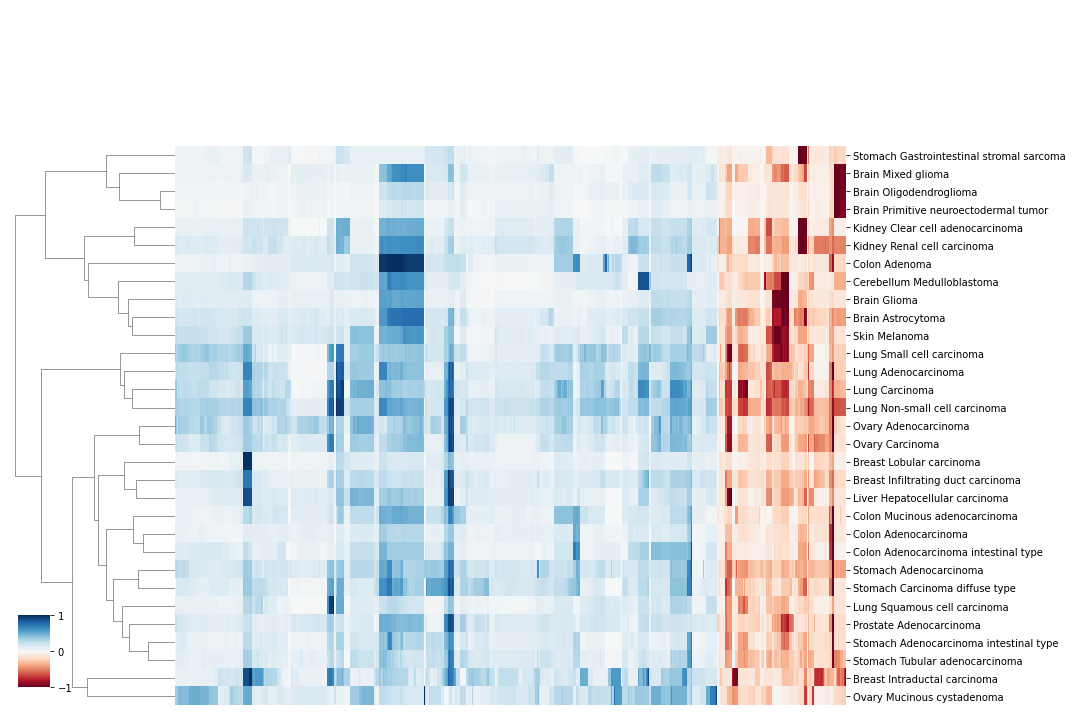

In [30]:
g = sns.clustermap(ddd, 
#                metric="correlation",
#                method="complete", 
               method="ward", 
               cmap="RdBu", 
               col_cluster=False, 
               xticklabels=False,
               yticklabels=disease_names,
                   figsize= (15,10),
                   cbar_pos=(0.02, 0.04, .03, .1)
              )

plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/cna_signature_heatmap.pdf',bbox_inches='tight')